In [ ]:
Ífrom google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


### Import

In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import tensorflow
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
# from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose 
from keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose 
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from PIL import Image
import glob

from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model


### Verify Image

In [ ]:
image_list = []
for filename in glob.glob('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/2/*.jpg'): 
    im = Image.open(filename)
    image_list.append(im)
    
print(image_list)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64F255950>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D2FB990>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D3015D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D301C50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D301D50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D301E90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D301F90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D3100D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D3101D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D301E50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D310390>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7FB64D310490>, <PIL.JpegImagePlugin.JpegIm

In [ ]:
image_list_0 = np.array(image_list[0])
image_list_0.shape

(32, 32, 3)

### Load Dataset 1

In [ ]:
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

datapath = Path('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32')
data_dir = sorted([x for x in datapath.iterdir()], key=lambda x: int(x.stem))
print(data_dir)

data = []
label = []

for dir_path in data_dir :
  for i , filename in enumerate(os.listdir(dir_path)):
    img = cv2.imread(os.path.join(dir_path,filename))
    img = cv2.resize(img, (32, 32))
    data.append(img)
    label.append([int(dir_path.stem)-2])

data2 = np.array(data)
data = np.array(data).astype(np.float32()) / 255.0
label = np.array(label).reshape(-1,1)

print("train",data.shape)
print("train_label",label.shape)
print("train",label.dtype)
train_X, test_X, train_y, test_y = train_test_split(data, label, train_size= 0.8)

[PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/2'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/3'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/4'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/5'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/6'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/7'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/8'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/9'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/10'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/11'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品

In [ ]:
test_X.shape

(431, 32, 32, 3)

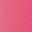

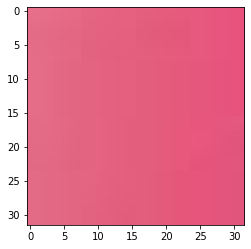

In [ ]:
data2.shape
# print(data2[0])
# np.min(data2[0])
# plt.imshow(data2[0])
cv2_imshow(data2[0])
plt.imshow(cv2.cvtColor(data2[0], cv2.COLOR_BGR2RGB))

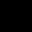

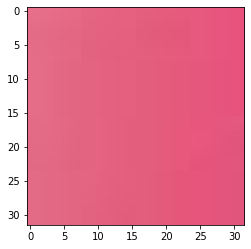

In [ ]:
data.shape
# print(data[0])
# np.min(data)
# plt.imshow(data[0])
cv2_imshow(data[0])
plt.imshow(cv2.cvtColor(data[0], cv2.COLOR_BGR2RGB))

### Load Dataset 2

In [ ]:
batch_size = 32
img_height = 32
img_width = 32

directory = '/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/'

train_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

val_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

Found 5869 files belonging to 11 classes.
Using 4696 files for training.
Found 5869 files belonging to 11 classes.
Using 1173 files for validation.


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = sorted( train_ds.class_names, key = lambda x:int(x) )
print(class_names)

['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


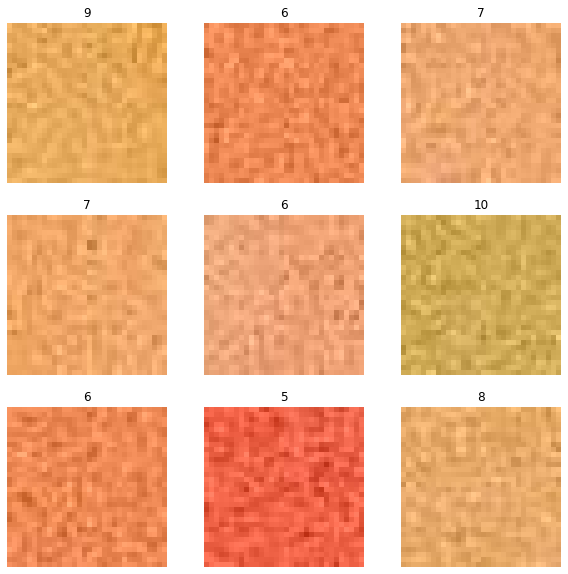

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
count = 0
for images, labels in train_ds.take(-1):
  count = count + 1 
  print(count)

**Train Data**

In [ ]:
train_ls = list(train_ds)

In [ ]:
len(train_ls)
# np.stack(train_np)
print(train_ls[0][0].shape)   

train_np_ds = train_ls[0][0]    # train_ls[0][0] : train data ;  train_ls[0][1] : train label
for i in range(1, len(train_ls)):
  train_np_ds = np.concatenate((train_ls[i][0], train_np_ds), axis=0)
train_np_ds.shape

(32, 32, 32, 3)


(4696, 32, 32, 3)

In [ ]:
# print(train_np_ds[0])
# plt.imshow(int(train_np_ds[0]))

**Train Label**

In [ ]:
train_np_label_ds = train_ls[0][1]    
for i in range(1, len(train_ls)):
  train_np_label_ds = np.concatenate((train_ls[i][1], train_np_label_ds), axis=0)
# train_np_label_ds.shape

In [ ]:
train_np_label_ds = train_np_label_ds.reshape(train_np_label_ds.shape[0], 1)
train_np_label_ds.shape

(4696, 1)

**Split VAL & Test Data**

In [ ]:
val_ls = list(val_ds)

In [ ]:
val_np_ds = val_ls[0][0]
for i in range(1, len(val_ls)):
  val_np_ds = np.concatenate((val_ls[i][0], val_np_ds), axis=0)
val_np_ds.shape

n = len(val_np_ds)//2
test_np_ds = val_np_ds[n:]
val_np_ds = val_np_ds[:n]

In [ ]:
print(val_np_ds.shape, test_np_ds.shape)

(586, 32, 32, 3) (587, 32, 32, 3)


**Split VAL & Test Label**

In [ ]:
val_np_label_ds = val_ls[0][1]
for i in range(1, len(val_ls)):
  val_np_label_ds = np.concatenate((val_ls[i][1], val_np_label_ds), axis=0)
val_np_label_ds.shape

n = len(val_np_label_ds)//2
test_np_label_ds = val_np_label_ds[n:]
val_np_label_ds = val_np_label_ds[:n]

In [ ]:
val_np_label_ds = val_np_label_ds.reshape(val_np_label_ds.shape[0], 1)
test_np_label_ds = test_np_label_ds.reshape(test_np_label_ds.shape[0], 1)
print(val_np_label_ds.shape, test_np_label_ds.shape)

(586, 1) (587, 1)


In [ ]:
train_X_2 = train_np_ds
train_ground = train_np_ds

valid_X_2 = val_np_ds
valid_ground = val_np_ds

In [ ]:
train_X_2.dtype, valid_X_2.dtype
np.max(train_X_2), np.max(valid_X_2)
train_X_2 = train_X_2 / np.max(train_X_2)
valid_X_2 = valid_X_2 / np.max(valid_X_2)
np.max(train_X_2), np.max(valid_X_2)

(1.0, 1.0)

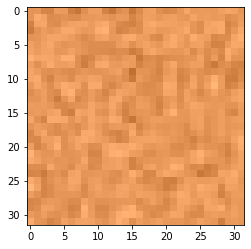

In [ ]:
plt.imshow(train_X_2[0])

## AutoEncoder

### AutoEncoder Model

#### AE1

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #16 x 16 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #8 x 8 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #8 x 8 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 3
    return decoded

#### AE2_encode ONE dim

In [ ]:
def encoder2(input_img):

    encoding_dim = 1

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)

    return encoder_output

def decoder2(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    # conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2) #32 x 32 x 3
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

#### AE2_encode Two dim

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

In [ ]:
def encoder4(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='tanh', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='tanh', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='tanh', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder4(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='tanh', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='tanh', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='tanh', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

### Training Model

In [ ]:
batch_size = 32
epochs = 50
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

In [ ]:
autoencoder = Model(input_img, decoder3(encoder3(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=1e-3))
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(learning_rate=1e-3))

(None, 2)
(None, 32, 32, 3)


In [ ]:
encoder_bottleneck = Model(input_img, encoder3(input_img))

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256   

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_X, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

# autoencoder_train = autoencoder.fit(train_X_2, train_X_2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_2, valid_X_2))

Epoch 1/50
44/44 [==============================] - 11s 18ms/step - loss: 1.0696 - val_loss: 0.7660
Epoch 2/50
44/44 [==============================] - 0s 7ms/step - loss: 0.9238 - val_loss: 1.1898
Epoch 3/50
44/44 [==============================] - 0s 7ms/step - loss: 0.8200 - val_loss: 1.4555
Epoch 4/50
44/44 [==============================] - 0s 7ms/step - loss: 0.7205 - val_loss: 1.5858
Epoch 5/50
44/44 [==============================] - 0s 7ms/step - loss: 0.6364 - val_loss: 1.6209
Epoch 6/50
44/44 [==============================] - 0s 7ms/step - loss: 0.5637 - val_loss: 1.5616
Epoch 7/50
44/44 [==============================] - 0s 7ms/step - loss: 0.4960 - val_loss: 1.4672
Epoch 8/50
44/44 [==============================] - 0s 7ms/step - loss: 0.4343 - val_loss: 1.3319
Epoch 9/50
44/44 [==============================] - 0s 7ms/step - loss: 0.3811 - val_loss: 1.1605
Epoch 10/50
44/44 [==============================] - 0s 7ms/step - loss: 0.3324 - val_loss: 0.9642
Epoch 11/50
44/44

### Save model

In [ ]:
from google.colab import files
import joblib

In [ ]:
autoencoder.save("/content/DFPE_AE_2.h5")
files.download('/content/DFPE_AE_2.h5')

joblib.dump(autoencoder_train, '/content/DFPE_AE_train_history_2')
files.download('/content/DFPE_AE_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
encoder_bottleneck.save("/content/DFPE_AE_bottle_twodim.h5")
files.download('/content/DFPE_AE_bottle_twodim.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
autoencoder = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_AE_2.h5')
autoencoder_train = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_AE_train_history_2')
encoder_bottleneck = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_AE_bottle_twodim.h5')

### Evaluate model

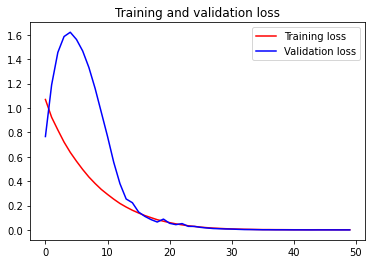

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
for i, value in enumerate(test_X):
  pre_img = autoencoder.predict(test_X[i:i+1])
  print(mse(test_X[i:i+1], pre_img).numpy())

1/1 [==============================] - 0s 165ms/step
0.048103537
1/1 [==============================] - 0s 14ms/step
0.0989782
1/1 [==============================] - 0s 14ms/step
0.05578042
1/1 [==============================] - 0s 16ms/step
0.060632866
1/1 [==============================] - 0s 14ms/step
0.065927684
1/1 [==============================] - 0s 15ms/step
0.05402847
1/1 [==============================] - 0s 13ms/step
0.086522475
1/1 [==============================] - 0s 13ms/step
0.052202884
1/1 [==============================] - 0s 14ms/step
0.049255215
1/1 [==============================] - 0s 17ms/step
0.049289834
1/1 [==============================] - 0s 14ms/step
0.08423273
1/1 [==============================] - 0s 15ms/step
0.056719046
1/1 [==============================] - 0s 15ms/step
0.05460082
1/1 [==============================] - 0s 18ms/step
0.09335096
1/1 [==============================] - 0s 14ms/step
0.06817642
1/1 [==============================] - 0s 14ms/

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
print(mse(train_X[1:2], pre_img).numpy())

0.09330021


In [ ]:
test_y[0]

array([4])

In [ ]:
test_np_label_ds_reshape= test_y.reshape(-1)
test_np_label_ds_reshape

array([ 4,  8,  1,  2,  6,  1,  5,  3,  6,  4,  9,  2,  1,  9,  6,  3,  0,
        6,  0,  2,  5, 10,  8,  6,  7,  5,  2, 10,  1,  7,  3,  2, 10,  7,
       10,  2,  0,  0,  2,  1,  8,  8,  2,  1,  1, 10,  8,  1,  5,  8, 10,
        2,  7,  4,  1, 10,  7,  4,  5,  3,  0,  7,  1,  6,  3,  7,  1,  1,
        1,  3,  8,  9,  3,  1,  4, 10,  0,  3,  7,  4,  0,  5,  1,  5, 10,
        3,  5, 10,  2,  1, 10,  4,  1,  4,  4,  7,  1,  5,  3,  6,  8,  2,
        8,  7,  5,  6,  3,  1,  9,  3,  9,  4,  6,  5,  6,  4,  8,  5,  1,
        6, 10,  2,  5, 10,  7,  1,  2,  1,  0,  7,  3,  8,  4,  1,  9,  7,
       10,  7,  3,  1,  1,  7, 10,  0,  6,  5,  2,  0,  9,  8,  9, 10,  1,
        5,  3,  1,  3, 10,  7,  2, 10,  4,  1, 10,  1,  8, 10, 10,  7,  8,
        1,  4,  6,  1,  8,  9,  6,  8,  1,  9, 10, 10, 10,  0,  8,  3,  7,
        1, 10,  6,  2,  0,  3,  1,  4,  1,  6,  4, 10,  7,  9,  0,  2,  0,
        7,  3,  3,  8,  8, 10,  5,  6,  9,  9,  5,  5,  6,  3,  5, 10,  9,
       10,  9,  7,  5,  1

In [ ]:
test_X.shape

(431, 32, 32, 3)

Bottle neck info

In [ ]:
encoded_imgs = encoder_bottleneck.predict(test_X)

14/14 [==============================] - 0s 2ms/step


In [ ]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(encoded_imgs, test_y):
  if l[0] == 0:
    class2.append([t[0],l[0]])
  elif l[0] == 1:
    class3.append([t[0],l[0]])
  elif l[0] == 2:
    class4.append([t[0],l[0]])
  elif l[0] == 3:
    class5.append([t[0],l[0]])
  elif l[0] == 4:
    class6.append([t[0],l[0]])
  elif l[0] == 5:
    class7.append([t[0],l[0]])
  elif l[0] == 6:
    class8.append([t[0],l[0]])    
  elif l[0] == 7:
    class9.append([t[0],l[0]])
  elif l[0] == 8:
    class10.append([t[0],l[0]])
  elif l[0] == 9:
    class11.append([t[0],l[0]])
  elif l[0] == 10:
    class12.append([t[0],l[0]])


print('ph 2 : ')
print("mean:", np.mean(np.array(class2)[:,0]))
print("srd:", np.std(np.array(class2)[:,0]))
# print(class2)

print('-------------------')
print('ph 3 : ')
print("mean:", np.mean(np.array(class3)[:,0]))
print("srd:", np.std(np.array(class3)[:,0]))
# print(class3)

print('-------------------')
print('ph 4 : ')
print("mean:", np.mean(np.array(class4)[:,0]))
print("srd:", np.std(np.array(class4)[:,0]))
# print(class4)

print('-------------------')
print('ph 5 : ')
print("mean:", np.mean(np.array(class5)[:,0]))
print("srd:", np.std(np.array(class5)[:,0]))
# print(class5)

print('-------------------')
print('ph 6 : ')
print("mean:", np.mean(np.array(class6)[:,0]))
print("srd:", np.std(np.array(class6)[:,0]))
# print(class6)

print('-------------------')
print('ph 7 : ')
print("mean:", np.mean(np.array(class7)[:,0]))
print("srd:", np.std(np.array(class7)[:,0]))
# print(class7)

print('-------------------')
print('ph 8 : ')
print("mean:", np.mean(np.array(class8)[:,0]))
print("srd:", np.std(np.array(class8)[:,0]))
# print(class8)

print('-------------------')
print('ph 9 : ')
print("mean:", np.mean(np.array(class9)[:,0]))
print("srd:", np.std(np.array(class9)[:,0]))
# print(class9)

print('-------------------')
print('ph 10 : ')
print("mean:", np.mean(np.array(class10)[:,0]))
print("srd:", np.std(np.array(class10)[:,0]))
# print(class10)

print('-------------------')
print('ph 11 : ')
print("mean:", np.mean(np.array(class11)[:,0]))
print("srd:", np.std(np.array(class11)[:,0]))
# print(class11)

print('-------------------')
print('ph 12 : ')
print("mean:", np.mean(np.array(class12)[:,0]))
print("srd:", np.std(np.array(class12)[:,0]))
# print(class12)

ph 2 : 
mean: 0.14814258221950796
srd: 0.015038574919009028
-------------------
ph 3 : 
mean: 0.15535560101270676
srd: 0.011313377050968383
-------------------
ph 4 : 
mean: 0.16143600940704345
srd: 0.013084885589976907
-------------------
ph 5 : 
mean: 0.15735495452945297
srd: 0.012739639901173239
-------------------
ph 6 : 
mean: 0.15140910542780353
srd: 0.01581733560061704
-------------------
ph 7 : 
mean: 0.15548437695170558
srd: 0.014734100030768088
-------------------
ph 8 : 
mean: 0.15776890615622202
srd: 0.015703974225892776
-------------------
ph 9 : 
mean: 0.1329654329589435
srd: 0.015555403286193956
-------------------
ph 10 : 
mean: 0.12497543069449338
srd: 0.01131951130675457
-------------------
ph 11 : 
mean: 0.13840940017253162
srd: 0.009794645883076639
-------------------
ph 12 : 
mean: 0.15631935521960258
srd: 0.006228013792230721


In [ ]:
encoded_imgs[0]

array([0.16173999, 0.04685307], dtype=float32)

PLOT

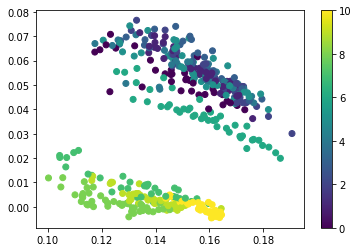

In [ ]:
# plotting
# encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c = test_y)
plt.colorbar()
plt.show()

###AE Decode Image (Predict) 

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
# AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_3.jpg")
# AE_image_crop_test_ph11 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/11/ph11_3.jpg")
# AE_image_crop_test_ph10 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/10/ph10_3.jpg")
# AE_image_crop_test_ph9 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/9/ph9_3.jpg")
# AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_3.jpg")
# AE_image_crop_test_ph7 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/7/ph7_3.jpg")
# AE_image_crop_test_ph6 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/6/ph6_3.jpg")
# AE_image_crop_test_ph5 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/5/ph5_3.jpg")
# AE_image_crop_test_ph4 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/4/ph4_3.jpg")
# AE_image_crop_test_ph3 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/3/ph3_3.jpg")
# AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_3.jpg")

AE_image_crop_test_ph12 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/12/ph12_3.jpg")
AE_image_crop_test_ph11 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/11/ph11_3.jpg")
AE_image_crop_test_ph10 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/10/ph10_3.jpg")
AE_image_crop_test_ph9 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/9/ph9_3.jpg")
AE_image_crop_test_ph8 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/8/ph8_3.jpg")
AE_image_crop_test_ph7 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/7/ph7_3.jpg")
AE_image_crop_test_ph6 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/6/ph6_3.jpg")
AE_image_crop_test_ph5 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/5/ph5_3.jpg")
AE_image_crop_test_ph4 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/4/ph4_3.jpg")
AE_image_crop_test_ph3 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/3/ph3_3.jpg")
AE_image_crop_test_ph2 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_crop_image_32_32/2/ph2_3.jpg")

(1, 32, 32, 3)


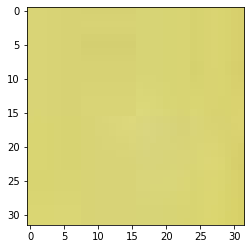

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph12, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

1/1 [==============================] - 0s 18ms/step


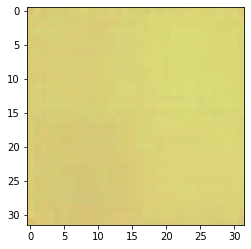

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph12 = encoder_bottleneck.predict(np_AE_image_crop_test_ph12_norm)
print(bottleneck_ph12)

1/1 [==============================] - 0s 18ms/step
[[ 0.16077797 -0.00032863]]


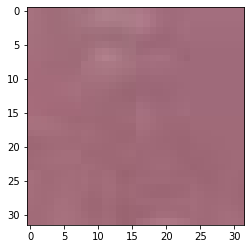

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph11, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph11 = np.array(AE_image_crop_test_ph11)
np_AE_image_crop_test_ph11 = np_AE_image_crop_test_ph11.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


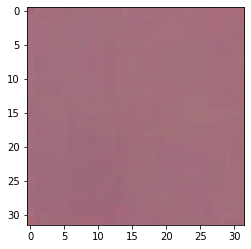

In [ ]:
np_AE_image_crop_test_ph11_norm = np_AE_image_crop_test_ph11 / 255

AE_test_ph11 = autoencoder.predict(np_AE_image_crop_test_ph11_norm)

# print(AE_test_ph12)
AE_test_ph11 = AE_test_ph11.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph11, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph11 = encoder_bottleneck.predict(np_AE_image_crop_test_ph11_norm)
print(bottleneck_ph11)

1/1 [==============================] - 0s 17ms/step
[[0.15104684 0.00052564]]


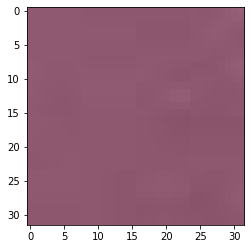

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph10, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph10 = np.array(AE_image_crop_test_ph10)
np_AE_image_crop_test_ph10 = np_AE_image_crop_test_ph10.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


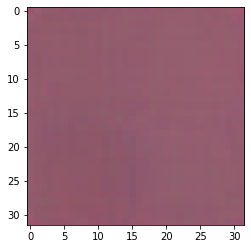

In [ ]:
np_AE_image_crop_test_ph10_norm = np_AE_image_crop_test_ph10 / 255

AE_test_ph10 = autoencoder.predict(np_AE_image_crop_test_ph10_norm)

# print(AE_test_ph12)
AE_test_ph10 = AE_test_ph10.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph10, cv2.COLOR_BGR2RGB))


In [ ]:
bottleneck_ph10 = encoder_bottleneck.predict(np_AE_image_crop_test_ph10_norm)
print(bottleneck_ph10)

1/1 [==============================] - 0s 17ms/step
[[0.13241379 0.00102772]]


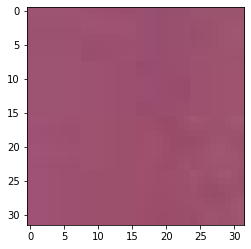

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph9, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph9 = np.array(AE_image_crop_test_ph9)
np_AE_image_crop_test_ph9 = np_AE_image_crop_test_ph9.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


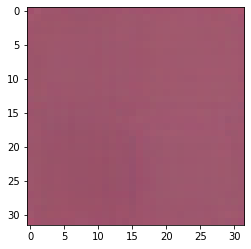

In [ ]:
np_AE_image_crop_test_ph9_norm = np_AE_image_crop_test_ph9 / 255

AE_test_ph9 = autoencoder.predict(np_AE_image_crop_test_ph9_norm)

# print(AE_test_ph12)
AE_test_ph9 = AE_test_ph9.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph9, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph9 = encoder_bottleneck.predict(np_AE_image_crop_test_ph9_norm)
print(bottleneck_ph9)

1/1 [==============================] - 0s 19ms/step
[[0.14174318 0.00794476]]


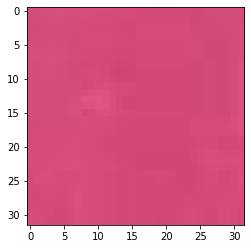

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph8, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph8 = np.array(AE_image_crop_test_ph8)
np_AE_image_crop_test_ph8 = np_AE_image_crop_test_ph8.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


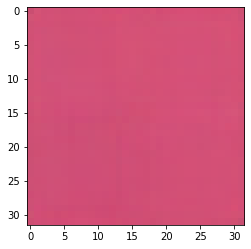

In [ ]:
np_AE_image_crop_test_ph8_norm = np_AE_image_crop_test_ph8 / 255

AE_test_ph8 = autoencoder.predict(np_AE_image_crop_test_ph8_norm)

# print(AE_test_ph12)
AE_test_ph8 = AE_test_ph8.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph8, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph8 = encoder_bottleneck.predict(np_AE_image_crop_test_ph8_norm)
print(bottleneck_ph8)

1/1 [==============================] - 0s 17ms/step
[[0.16322067 0.03660912]]


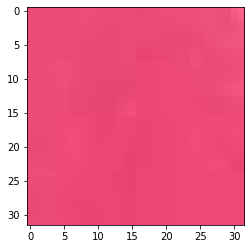

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph7, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph7 = np.array(AE_image_crop_test_ph7)
np_AE_image_crop_test_ph7 = np_AE_image_crop_test_ph7.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


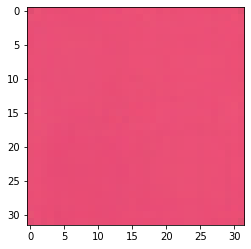

In [ ]:
np_AE_image_crop_test_ph7_norm = np_AE_image_crop_test_ph7 / 255

AE_test_ph7 = autoencoder.predict(np_AE_image_crop_test_ph7_norm)

# print(AE_test_ph12)
AE_test_ph7 = AE_test_ph7.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph7, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph7 = encoder_bottleneck.predict(np_AE_image_crop_test_ph7_norm)
print(bottleneck_ph7)

1/1 [==============================] - 0s 16ms/step
[[0.16968332 0.04547188]]


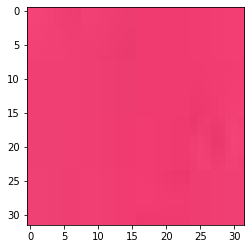

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph6, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph6 = np.array(AE_image_crop_test_ph6)
np_AE_image_crop_test_ph6 = np_AE_image_crop_test_ph6.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


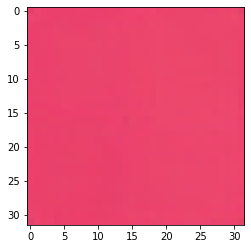

In [ ]:
np_AE_image_crop_test_ph6_norm = np_AE_image_crop_test_ph6 / 255

AE_test_ph6 = autoencoder.predict(np_AE_image_crop_test_ph6_norm)

# print(AE_test_ph12)
AE_test_ph6 = AE_test_ph6.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph6, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph6 = encoder_bottleneck.predict(np_AE_image_crop_test_ph6_norm)
print(bottleneck_ph6)

1/1 [==============================] - 0s 18ms/step
[[0.16174208 0.05520404]]


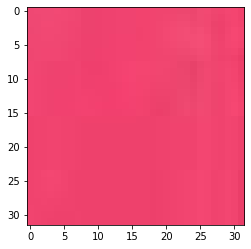

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph5, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph5 = np.array(AE_image_crop_test_ph5)
np_AE_image_crop_test_ph5 = np_AE_image_crop_test_ph5.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 19ms/step


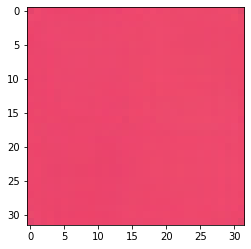

In [ ]:
np_AE_image_crop_test_ph5_norm = np_AE_image_crop_test_ph5 / 255

AE_test_ph5 = autoencoder.predict(np_AE_image_crop_test_ph5_norm)

# print(AE_test_ph12)
AE_test_ph5 = AE_test_ph5.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph5, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph5 = encoder_bottleneck.predict(np_AE_image_crop_test_ph5_norm)
print(bottleneck_ph5)

1/1 [==============================] - 0s 17ms/step
[[0.16492039 0.05677916]]


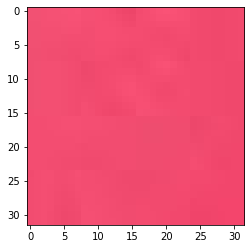

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph4, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph4 = np.array(AE_image_crop_test_ph4)
np_AE_image_crop_test_ph4 = np_AE_image_crop_test_ph4.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


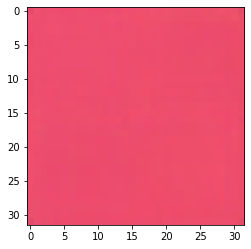

In [ ]:
np_AE_image_crop_test_ph4_norm = np_AE_image_crop_test_ph4 / 255

AE_test_ph4 = autoencoder.predict(np_AE_image_crop_test_ph4_norm)

# print(AE_test_ph12)
AE_test_ph4 = AE_test_ph4.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph4, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph4 = encoder_bottleneck.predict(np_AE_image_crop_test_ph4_norm)
print(bottleneck_ph4)

1/1 [==============================] - 0s 17ms/step
[[0.16530013 0.05509441]]


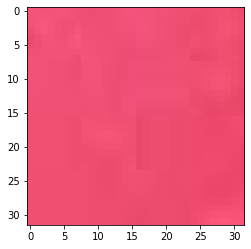

In [ ]:

# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph3, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph3 = np.array(AE_image_crop_test_ph3)
np_AE_image_crop_test_ph3 = np_AE_image_crop_test_ph3.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 18ms/step


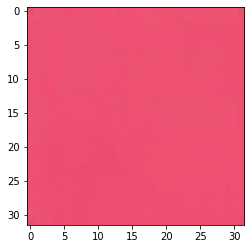

In [ ]:
np_AE_image_crop_test_ph3_norm = np_AE_image_crop_test_ph3 / 255

AE_test_ph3 = autoencoder.predict(np_AE_image_crop_test_ph3_norm)

# print(AE_test_ph12)
AE_test_ph3 = AE_test_ph3.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph3, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph3 = encoder_bottleneck.predict(np_AE_image_crop_test_ph3_norm)
print(bottleneck_ph3)

1/1 [==============================] - 0s 16ms/step
[[0.16789697 0.05159609]]


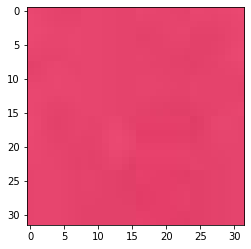

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph2, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

1/1 [==============================] - 0s 19ms/step


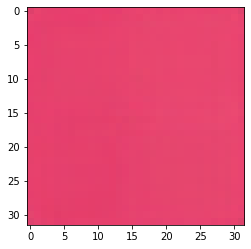

In [ ]:
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)

# print(AE_test_ph12)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph2 = encoder_bottleneck.predict(np_AE_image_crop_test_ph2_norm)
print(bottleneck_ph2)

1/1 [==============================] - 0s 18ms/step
[[0.15603763 0.05179364]]


### (testing) AE Decode Image

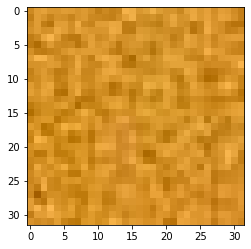

In [ ]:
for i in range(3):
  plt.imshow(cv2.cvtColor(test_X[], cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg")

AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_10.jpg")

AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_10.jpg")

(1, 32, 32, 3)


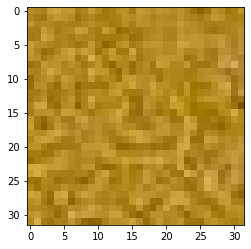

In [ ]:
plt.imshow(AE_image_crop_test_ph12)

# img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
# np_AE_image_crop_test_ph12 = np.array(img)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
np_AE_image_crop_test_ph12 = np.array(img)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

(1, 32, 32, 3)


In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

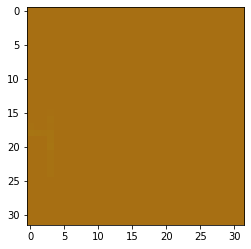

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

(1, 32, 32, 3)


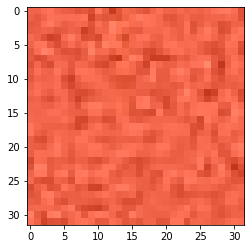

In [ ]:
plt.imshow(AE_image_crop_test_ph2)
# img = cv2.imread("/content/gdrive/MyDrive/NCHU/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_56_56/2/ph2_10.jpg")
# res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph2.shape)

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)
AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)
AE_test_ph12.shape
AE_test_ph2.shape

(1, 32, 32, 3)

In [ ]:
aa = ( AE_test_ph12 - np.min(AE_test_ph12) ) * 255 / ( np.max(AE_test_ph12) - np.min(AE_test_ph12) )

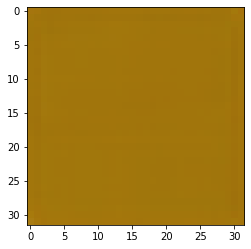

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
plt.imshow(AE_test_ph12)
# plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

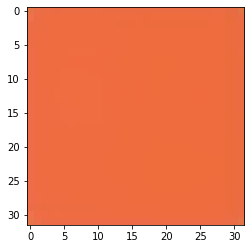

In [ ]:
# print(AE_test_2)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
plt.imshow(AE_test_ph2)
# plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
train_X_2.shape

(4696, 32, 32, 3)

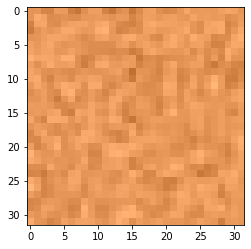

In [ ]:
plt.imshow(train_X_2[0])

In [ ]:
train_np_ds.shape

(4696, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


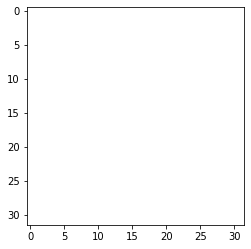

In [ ]:
plt.imshow(train_np_ds[0])

### AE Classifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [8]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[ 4]
 [ 8]
 [ 6]
 [ 7]
 [ 6]
 [ 9]
 [10]
 [ 3]
 [ 2]
 [ 9]]


In [ ]:
num_classes = 11
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

# activation='softmax' activation='sigmoid

In [ ]:
# batch_size = 32
# epochs = 30
# inChannel = 3
# x, y = 32, 32
# input_img = Input(shape = (x, y, inChannel))

In [ ]:
encode = encoder_bottleneck(input_img)
full_model = Model(input_img, fc(encode))

(None, 11)


In [ ]:
encode.shape

TensorShape([None, 2])

In [ ]:
# full_model.compile(optimizer='adam',
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])


# compile model
full_model.compile(loss = keras.losses.mse, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4) ,metrics=['accuracy'])

In [ ]:
full_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model_1 (Functional)        (None, 2)                 95682     
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 11)                1419      
                                                                 
Total params: 97,485
Trainable params: 96,781
Non-trainable params: 704
_________________________________________________________________


In [ ]:
history_classify = full_model.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0780 - accuracy: 0.1975 - val_loss: 0.0825 - val_accuracy: 0.1014
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0718 - accuracy: 0.2360 - val_loss: 0.0823 - val_accuracy: 0.1768
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0650 - accuracy: 0.3319 - val_loss: 0.0818 - val_accuracy: 0.1014
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0594 - accuracy: 0.3827 - val_loss: 0.0810 - val_accuracy: 0.1536
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0565 - accuracy: 0.4386 - val_loss: 0.0799 - val_accuracy: 0.1188
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0520 - accuracy: 0.5258 - val_loss: 0.0778 - val_accuracy: 0.1826
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0492 - accuracy: 0.5664 - val_loss: 0.0748 - val_accuracy: 0.2957
Epoch 8/100


### Save classifier model

In [ ]:
full_model.save("/content/DFPE_AE_2_FC.h5")
files.download('/content/DFPE_AE_2_FC.h5')

joblib.dump(history_classify, '/content/DFPE_AE_FC_train_history_2')
files.download('/content/DFPE_AE_FC_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE classifier model

In [ ]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_AE_2_FC.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_AE_FC_train_history_2')

# full_model = load_model('/content/PEPE_AE_2_FC.h5')
# history_classify = joblib.load('/content/PEPE_AE_FC_train_history_2')

### Evaluate classifier model

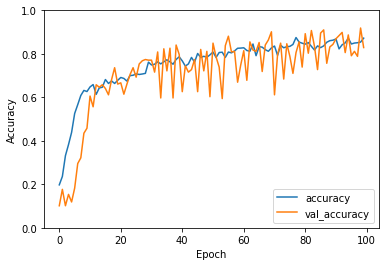

In [ ]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.0203
Test accuracy: 0.8237


In [ ]:
pre_img_test = full_model.predict(test_X)
pre_img_train = full_model.predict(train_X)

54/54 [==============================] - 0s 2ms/step


In [ ]:
test_X.shape

(431, 32, 32, 3)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[8.9928436e-01 1.5356949e-04 7.4839289e-07 4.7640695e-04 8.9751380e-03
 3.9745476e-02 5.0209355e-02 1.0967090e-03 1.5891970e-05 2.3749031e-05
 1.8592553e-05]
0.89928436
0
0.99999994


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(431,)

In [ ]:
pre_img[4], test_y[4]

(0, array([0]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[35  0  0  0  0  0  1  0  0  0  0]
 [ 8 29  0  3  0  0  0  0  0  0  0]
 [ 2  7 31  0  0  0  0  0  0  0  0]
 [12  0  0 17  8  0  0  0  0  0  0]
 [11  0  0  0  4 16  0  0  0  0  0]
 [18  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0  0 44  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.41      0.97      0.57        36
           1       0.81      0.72      0.76        40
           2       1.00      0.78      0.87        40
           3       0.85      0.46      0.60        37
           4       0.33      0.13      0.19        31
           5       0.61      0.58      0.60        43
           6       0.98      1.00      0.99        45
           7       1.00      1.00      1.00        35
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        40
        

Text(33.0, 0.5, 'True Label')

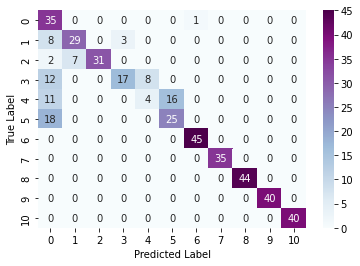

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### AE_2dim plot

In [ ]:
encoded_data = encoder_bottleneck.predict(test_X)
encoded_data.shape

14/14 [==============================] - 0s 2ms/step


(431, 2)

In [ ]:
encoded_data_pred_2 = pd.DataFrame(data = encoded_data
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2['label'] = test_y + 2

In [ ]:
encoded_data_pred_2.head()

,principal component 1,principal component 2,label
0,-14.665957,-8.143660,2
1,-35.949852,6.497524,6
2,-9.751054,15.894270,4
3,-30.994932,1.853779,7
4,-15.506753,-10.671089,2


In [ ]:
encoded_data_pred_2_normilize = (encoded_data_pred_2.iloc[:,:-1] - np.min(encoded_data_pred_2.iloc[:,:-1])) / (np.max(encoded_data_pred_2.iloc[:,:-1]) - np.min(encoded_data_pred_2.iloc[:,:-1])) * 100

In [ ]:
encoded_data_pred_2_norm = pd.DataFrame(data = encoded_data_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2_norm['label'] = test_y + 2

In [ ]:
encoded_data_pred_2_norm

,principal component 1,principal component 2,label
0,23.762005,21.079588,9
1,36.500420,63.990067,7
2,37.649345,6.484289,10
3,16.838280,14.861444,9
4,96.445427,98.827744,12
...,...,...,...
426,59.596287,17.316839,11
427,95.779678,98.198303,12
428,31.707907,83.025391,6
429,7.363698,44.525139,8


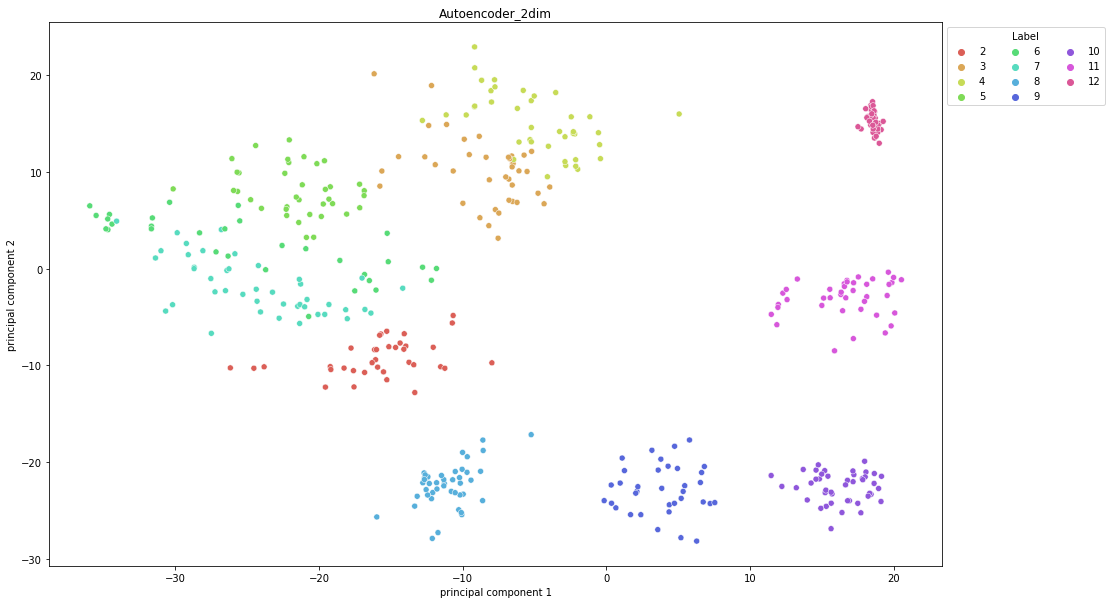

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= encoded_data_pred_2,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### AE_mean plot

In [ ]:
encoded_data_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,-14.665957,-8.143660
1,-35.949852,6.497524
2,-9.751054,15.894270
3,-30.994932,1.853779
4,-15.506753,-10.671089
...,...,...
426,-29.866959,3.715763
427,4.367475,-25.150272
428,-13.336946,-24.554495
429,-12.661852,-21.800520


In [ ]:
np.min(encoded_data_pred_2.iloc[:,:-1])

principal component 1   -35.949852
principal component 2   -28.169203
dtype: float32

In [ ]:
np.max(encoded_data_pred_2.iloc[:,:-1])

principal component 1    20.540163
principal component 2    22.932493
dtype: float32

In [ ]:
encoded_data_pred_2.iloc[:,2:3]

,label
0,2
1,6
2,4
3,7
4,2
...,...
426,7
427,9
428,8
429,8


In [ ]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(encoded_data_pred_2), np.array(encoded_data_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [ ]:
number_of_elements = len(class12)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  40


In [ ]:
mean_x_AE = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_AE)

[-15.812554266717699, -8.55866659283638, -4.937790624052286, -21.585027488502295, -24.83700869160314, -24.275317014649858, -11.10429374906752, 3.8677675149270465, 16.278745066035878, 16.613742613792418, 18.58408718109131]


In [ ]:
mean_XX_AE = np.mean(mean_x_AE)
print(mean_XX_AE)

-5.069665095598412


In [ ]:
mean_y_AE = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_AE)

[-9.220643255445692, 10.115370988845825, 15.083334112167359, 8.049796310631004, 2.4444845396905177, -1.8233741336653746, -22.34955923292372, -22.83053250994001, -22.578789710998535, -3.030139524489641, 15.164266729354859]


In [ ]:
mean_YY_AE = np.mean(mean_y_AE)
print(mean_YY_AE)

-2.8159805169794008


In [ ]:
AE_mean_ph = pd.DataFrame(data = zip(mean_x_AE, mean_y_AE)
             , columns = ['principal component 1', 'principal component 2'])
AE_mean_ph['label'] = AE_mean_ph.index + 2

print(round(AE_mean_ph, 4))

    principal component 1  principal component 2  label
0                -15.8126                -9.2206      2
1                 -8.5587                10.1154      3
2                 -4.9378                15.0833      4
3                -21.5850                 8.0498      5
4                -24.8370                 2.4445      6
5                -24.2753                -1.8234      7
6                -11.1043               -22.3496      8
7                  3.8678               -22.8305      9
8                 16.2787               -22.5788     10
9                 16.6137                -3.0301     11
10                18.5841                15.1643     12


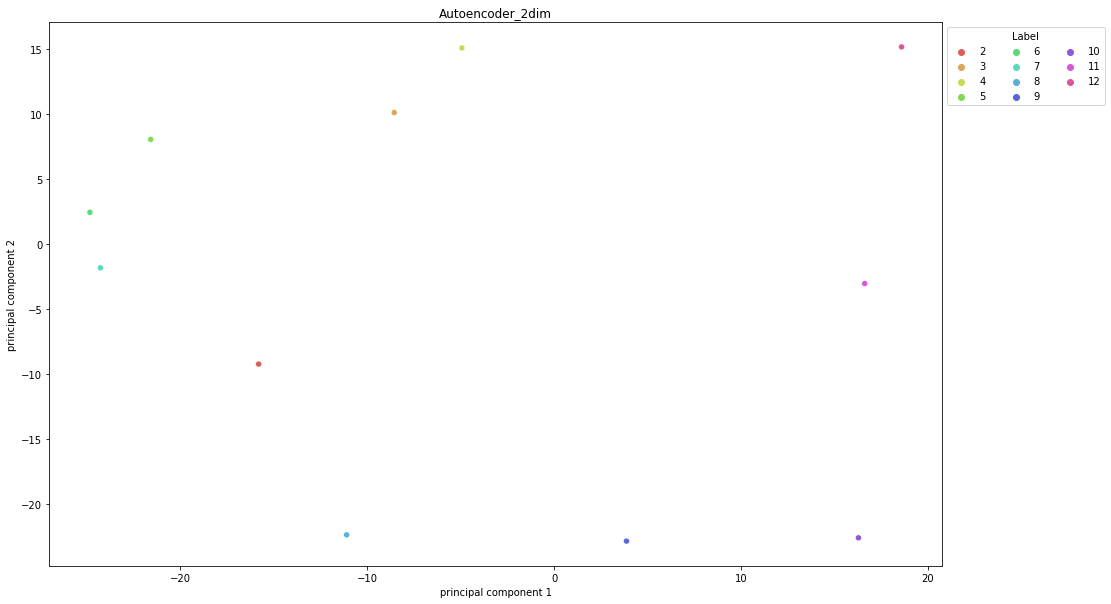

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= AE_mean_ph,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [ ]:
encoded_data_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,-14.665957,-8.143660,2
1,-35.949852,6.497524,6
2,-9.751054,15.894270,4
3,-30.994932,1.853779,7
4,-15.506753,-10.671089,2
...,...,...,...
426,-29.866959,3.715763,7
427,4.367475,-25.150272,9
428,-13.336946,-24.554495,8
429,-12.661852,-21.800520,8


In [ ]:
class_feature_means_AE = pd.DataFrame()
for c, rows in encoded_data_pred_2.groupby('label'):
    class_feature_means_AE[c] = rows.mean()
class_feature_means_AE

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-15.812552,-8.558666,-4.937790,-21.585030,-24.837008,-24.275320,-11.104294,3.867768,16.278744,16.613743,18.584085
principal component 2,-9.220644,10.115372,15.083333,8.049795,2.444484,-1.823374,-22.349560,-22.830532,-22.578789,-3.030139,15.164267
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [ ]:
class_feature_means_AE.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-15.812552,-8.558666,-4.937790,-21.585030,-24.837008,-24.275320,-11.104294,3.867768,16.278744,16.613743,18.584085
principal component 2,-9.220644,10.115372,15.083333,8.049795,2.444484,-1.823374,-22.349560,-22.830532,-22.578789,-3.030139,15.164267


In [ ]:
print(mean_XX_AE, mean_YY_AE)

-5.069665095598412 -2.8159805169794008


In [ ]:
aa = class_feature_means_AE.iloc[:1,:] - mean_XX_AE
bb = class_feature_means_AE.iloc[1:2,:] - mean_YY_AE

In [ ]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,-6.404663,12.931352,17.899314,10.865776,5.260465,0.992606,-19.533579,-20.014552,-19.762808,-0.214159,17.980247


In [ ]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [ ]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_AE = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_AE)) 

20.5553


In [ ]:
all_class_AE = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_AE[m]):

    sum += np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2))
    print(x, y, np.array(class_feature_means_AE.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  print(i+1)
  print(sum)

within_class_AE = sum2/11
print("{:.4f}".format(within_class_AE)) 


 ph  2
-14.6659574508667 -8.143659591674805 [-15.81255245  -9.220644  ]
-15.506752967834473 -10.671089172363281 [-15.81255245  -9.220644  ]
-16.129230499267578 -8.376008987426758 [-15.81255245  -9.220644  ]
-15.134264945983887 -8.066752433776855 [-15.81255245  -9.220644  ]
-13.951956748962402 -8.00403118133545 [-15.81255245  -9.220644  ]
-23.81601905822754 -10.147541999816895 [-15.81255245  -9.220644  ]
-16.058507919311523 -9.41372299194336 [-15.81255245  -9.220644  ]
-18.25306510925293 -10.277982711791992 [-15.81255245  -9.220644  ]
-15.689000129699707 -6.756083965301514 [-15.81255245  -9.220644  ]
-16.821340560913086 -10.72937297821045 [-15.81255245  -9.220644  ]
-10.718759536743164 -5.6158366203308105 [-15.81255245  -9.220644  ]
-15.275485038757324 -11.488130569458008 [-15.81255245  -9.220644  ]
-17.560182571411133 -12.227630615234375 [-15.81255245  -9.220644  ]
-11.529318809509277 -10.141878128051758 [-15.81255245  -9.220644  ]
-14.090584754943848 -8.328207969665527 [-15.81255245 

In [ ]:
print("{:.4f}".format(within_class_AE))

3.5516


In [ ]:
print("{:.4f}".format(between_class_AE / within_class_AE)) 

5.7877


In [ ]:

x, y, _ = class2[0]

testsum = np.sqrt((x - class_feature_means.iloc[0,0])**2 + (y - class_feature_means.iloc[1,0])**2)
print(x, y, np.array(class_feature_means.iloc[:2,0]))

print(testsum)



0.19626385 -0.022941753 [ 0.20877524 -0.02670655]
0.013065545712903116


## PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

### verify train data

In [ ]:
print('Traning data shape:', train_X.shape)
print('Testing data shape:', test_X.shape)

Traning data shape: (1722, 32, 32, 3)
Testing data shape: (431, 32, 32, 3)


In [ ]:
train_y.shape, test_y.shape

((1722, 1), (431, 1))

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
label_dict = {
 0: 'PH2',
 1: 'PH3',
 2: 'PH4',
 3: 'PH5',
 4: 'PH6',
 5: 'PH7',
 6: 'PH8',
 7: 'PH9',
 8: 'PH10',
 9: 'PH11',
 10: 'PH12',
}

Text(0.5, 1.0, '(Label: PH6)')
Text(0.5, 1.0, '(Label: PH2)')


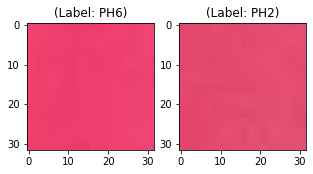

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_X[0], (32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[train_y[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_X[0],(32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[test_y[0][0]]) + ")"))

### Data Preprocessing


In [ ]:
np.min(train_X),np.max(train_X)
np.min(test_X),np.max(test_X)

(0.0, 1.0)

In [ ]:
x_train = train_X/255.0
np.min(x_train),np.max(x_train)

x_test = test_X/255.0
np.min(x_test),np.max(x_test)

(0.0, 0.003921569)

In [ ]:
x_train.shape, x_test.shape

((1722, 32, 32, 3), (431, 32, 32, 3))

In [ ]:
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)
x_train_flat.shape, x_test_flat.shape

((1722, 3072), (431, 3072))

In [ ]:
feat_cols_train = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]

In [ ]:
df_dataset_train = pd.DataFrame(x_train_flat, columns=feat_cols_train)
df_dataset_test = pd.DataFrame(x_test_flat, columns=feat_cols_test)

In [ ]:
df_dataset_train['label'] = train_y
print('Size of the dataframe: {}'.format(df_dataset_train.shape))

df_dataset_test['label'] = test_y
print('Size of the dataframe: {}'.format(df_dataset_test.shape))

Size of the dataframe: (1722, 3073)
Size of the dataframe: (431, 3073)


In [ ]:
# df_dataset_train.head()
df_dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.001661,0.001107,0.003476,0.001661,0.001107,0.003476,0.001661,0.001107,0.003476,0.001676,...,0.001769,0.001200,0.003506,0.001769,0.001200,0.003506,0.001769,0.001200,0.003506,0
1,0.001246,0.000000,0.003506,0.001261,0.000000,0.003522,0.001276,0.000000,0.003568,0.001261,...,0.001323,0.000015,0.003614,0.001323,0.000015,0.003614,0.001307,0.000000,0.003599,4
2,0.001446,0.000569,0.003722,0.001399,0.000523,0.003676,0.001430,0.000554,0.003706,0.001492,...,0.001415,0.000446,0.003676,0.001384,0.000415,0.003645,0.001338,0.000369,0.003599,2
3,0.001753,0.001000,0.003614,0.001769,0.001015,0.003629,0.001799,0.001046,0.003660,0.001815,...,0.001892,0.001169,0.003676,0.001876,0.001153,0.003660,0.001876,0.001153,0.003660,5
4,0.001399,0.000692,0.003414,0.001399,0.000692,0.003414,0.001399,0.000692,0.003414,0.001399,...,0.001522,0.000938,0.003399,0.001522,0.000938,0.003399,0.001538,0.000953,0.003414,0


In [ ]:
df_dataset_test.shape

(431, 3073)

### PCA fit transform

In [ ]:
df_dataset_train.iloc[:,:-1].shape

(1722, 3072)

In [ ]:
pca_dataset_train_2 = PCA(n_components=2)
# pca_dataset_train_2.fit(df_dataset_train.iloc[:,:-1])
pca_dataset_train_2.fit(x_train_flat)
# principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(df_dataset_test.iloc[:,:-1])
principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(x_test_flat)

In [ ]:
principalComponents_ds_test_pred_2.shape

(431, 2)

In [ ]:
principal_ds_Df_pred_2 = pd.DataFrame(data = principalComponents_ds_test_pred_2
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2['label'] = test_y + 2

In [ ]:
principal_ds_Df_pred_2.head()

,principal component 1,principal component 2,label
0,-0.003665,-0.010781,2
1,-0.040519,-0.006175,6
2,-0.026870,-0.011069,4
3,-0.005095,-0.015910,7
4,-0.012789,-0.004808,2


In [ ]:
principal_ds_Df_pred_2.shape

(431, 3)

In [ ]:
principal_ds_Df_pred_2_normilize = (principal_ds_Df_pred_2.iloc[:,:-1] - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) / (np.max(principal_ds_Df_pred_2.iloc[:,:-1]) - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) * 100

In [ ]:
principal_ds_Df_pred_2_norm = pd.DataFrame(data = principal_ds_Df_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2_norm['label'] = test_y + 2

In [ ]:
principal_ds_Df_pred_2_norm

,principal component 1,principal component 2,label
0,35.444496,15.349674,2
1,0.623499,22.043921,6
2,13.519779,14.931305,4
3,34.093975,7.895138,7
4,26.823732,24.032003,2
...,...,...,...
426,36.907822,5.657427,7
427,50.475250,56.512325,9
428,26.799685,31.993654,8
429,33.279369,29.706585,8


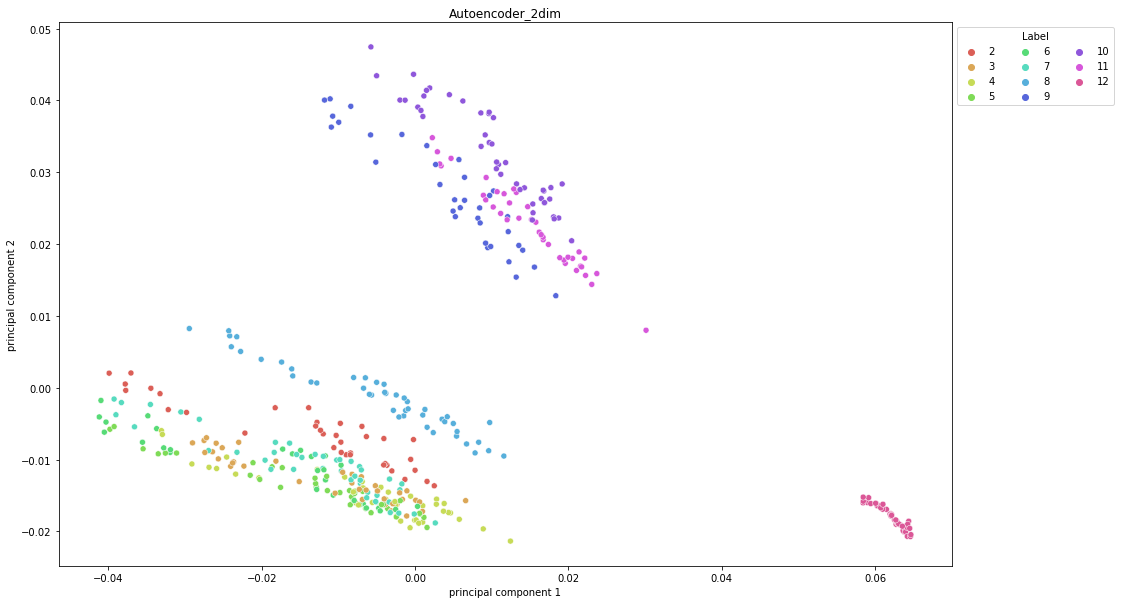

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

[Text(0.5, 1.0, 'PCA_train_2dim')]

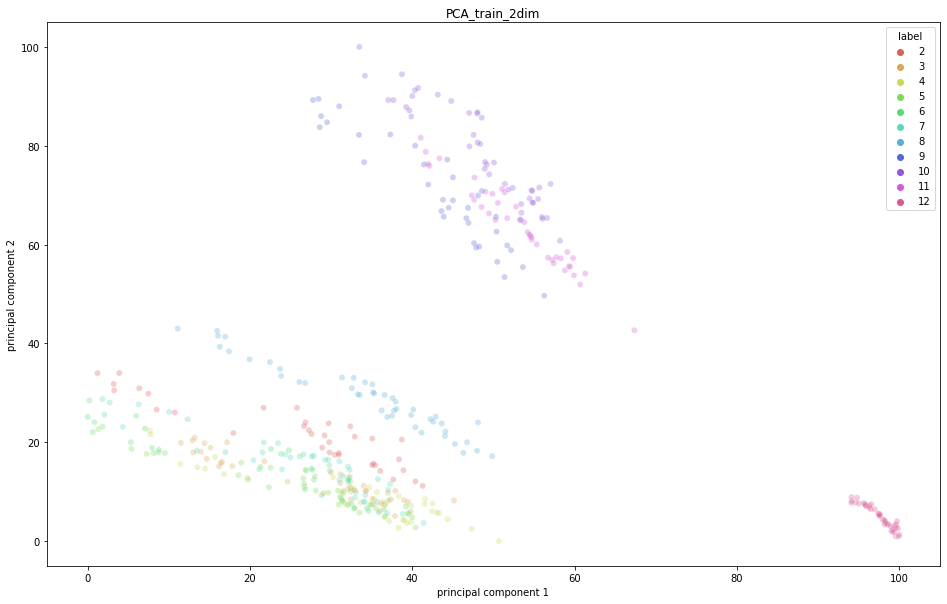

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2_norm,
    legend="full",
    alpha=0.3,
).set(title='PCA_train_2dim')


有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

In [ ]:
print("各主成分方向：\n",pca_dataset_train_2.components_.shape)
print('Explained variation per principal component: {}'.format(pca_dataset_train_2.explained_variance_ratio_))
print(format(pca_dataset_train_2.explained_variance_))
print(format(pca_dataset_train_2.singular_values_))

各主成分方向：
 (2, 3072)
Explained variation per principal component: [0.58313334 0.3650368 ]
[0.0005748  0.00035982]
[0.9945987 0.786923 ]


### PCA_mean plot

In [ ]:
principal_ds_Df_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,-0.003665,-0.010781
1,-0.040519,-0.006175
2,-0.026870,-0.011069
3,-0.005095,-0.015910
4,-0.012789,-0.004808
...,...,...
426,-0.002117,-0.017450
427,0.012243,0.017540
428,-0.012815,0.000670
429,-0.005957,-0.000903


In [ ]:
principal_ds_Df_pred_2_norm.iloc[:,2:3]

,label
0,2
1,6
2,4
3,7
4,2
...,...
426,7
427,9
428,8
429,8


In [ ]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(principal_ds_Df_pred_2.iloc[:,:-1]), np.array(principal_ds_Df_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [ ]:
number_of_elements = len(class12)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  40


In [ ]:
mean_x_PCA = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_PCA)

[-0.013676828016337418, -0.011599299534100282, -0.006441968609760806, -0.013198731736141583, -0.01808148998703297, -0.013825152384734517, -0.004876125394366682, 0.004473427101038397, 0.009875051158649678, 0.01505761460866779, 0.06205877689644694]


In [ ]:
mean_XX_PCA = np.mean(mean_x_PCA)
print(mean_XX_PCA)

0.0008877521911207775


In [ ]:
mean_y_PCA = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_PCA)

[-0.006459837528786415, -0.012790345377288759, -0.015108711947686971, -0.013771841075976152, -0.010924805845734813, -0.010842789893125206, -0.0014052842311179524, 0.026990020035633017, 0.032772654074836864, 0.02257944974116981, -0.017968881712295114]


In [ ]:
mean_YY_PCA = np.mean(mean_y_PCA)
print(mean_YY_PCA)

-0.0006300339782156078


In [ ]:
PCA_mean_ph = pd.DataFrame(data = zip(mean_x_PCA, mean_y_PCA)
             , columns = ['principal component 1', 'principal component 2'])
PCA_mean_ph['label'] = PCA_mean_ph.index + 2

print(round(PCA_mean_ph, 4))

    principal component 1  principal component 2  label
0                 -0.0137                -0.0065      2
1                 -0.0116                -0.0128      3
2                 -0.0064                -0.0151      4
3                 -0.0132                -0.0138      5
4                 -0.0181                -0.0109      6
5                 -0.0138                -0.0108      7
6                 -0.0049                -0.0014      8
7                  0.0045                 0.0270      9
8                  0.0099                 0.0328     10
9                  0.0151                 0.0226     11
10                 0.0621                -0.0180     12


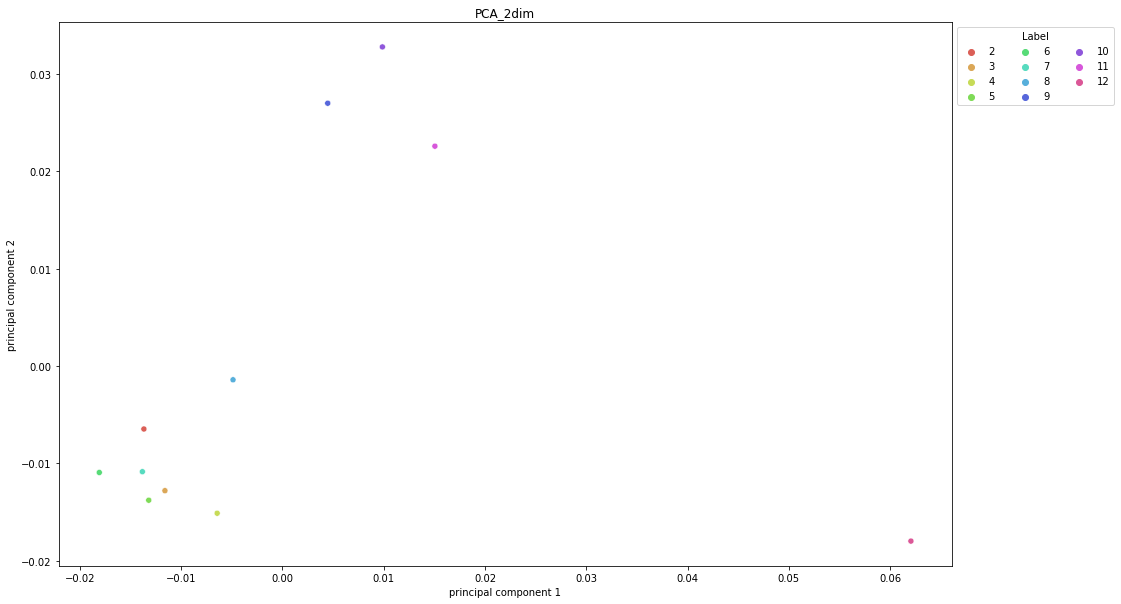

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= PCA_mean_ph,
    legend="full",
)
ax.set(title='PCA_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [ ]:
principal_ds_Df_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,-0.003665,-0.010781,2
1,-0.040519,-0.006175,6
2,-0.026870,-0.011069,4
3,-0.005095,-0.015910,7
4,-0.012789,-0.004808,2
...,...,...,...
426,-0.002117,-0.017450,7
427,0.012243,0.017540,9
428,-0.012815,0.000670,8
429,-0.005957,-0.000903,8


In [ ]:
class_feature_means_PCA = pd.DataFrame()
for c, rows in principal_ds_Df_pred_2.groupby('label'):
    class_feature_means_PCA[c] = rows.mean()
class_feature_means_PCA

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-0.013677,-0.011599,-0.006442,-0.013199,-0.018081,-0.013825,-0.004876,0.004473,0.009875,0.015058,0.062059
principal component 2,-0.006460,-0.012790,-0.015109,-0.013772,-0.010925,-0.010843,-0.001405,0.026990,0.032773,0.022579,-0.017969
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [ ]:
class_feature_means_PCA.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-0.013677,-0.011599,-0.006442,-0.013199,-0.018081,-0.013825,-0.004876,0.004473,0.009875,0.015058,0.062059
principal component 2,-0.006460,-0.012790,-0.015109,-0.013772,-0.010925,-0.010843,-0.001405,0.026990,0.032773,0.022579,-0.017969


In [ ]:
print(mean_XX_PCA, mean_YY_PCA)

0.0008877521911207775 -0.0006300339782156078


In [ ]:
aa = class_feature_means_PCA.iloc[:1,:] - mean_XX_PCA
bb = class_feature_means_PCA.iloc[1:2,:] - mean_YY_PCA

In [ ]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,-0.00583,-0.01216,-0.014479,-0.013142,-0.010295,-0.010213,-0.000775,0.02762,0.033403,0.023209,-0.017339


In [ ]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [ ]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_PCA = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_PCA)) 

0.0243


In [ ]:
all_class_PCA = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  # print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_PCA[m]):

    sum += np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2))
    # print(x, y, np.array(class_feature_means_PCA.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  # print(i+1)
  # print(sum)

within_class_PCA = sum2/11
print("{:.4f}".format(within_class_PCA))

0.0091


In [ ]:
print("{:.4f}".format(between_class_PCA / within_class_PCA))

2.6729


### PCA classifer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

In [ ]:
x_train_flat.shape, x_test_flat.shape

((1722, 3072), (431, 3072))

In [ ]:
pca_train = PCA(2)
pca_train.fit(x_train_flat)
train_img_pca = pca_train.transform(x_train_flat)

pca_test = PCA(2)
pca_test.fit(x_test_flat)
test_img_pca = pca_train.transform(x_test_flat)

In [ ]:
train_img_pca.shape, test_img_pca.shape

((1722, 2), (431, 2))

In [ ]:
y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)

In [ ]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [8]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[ 4]
 [ 8]
 [ 6]
 [ 7]
 [ 6]
 [ 9]
 [10]
 [ 3]
 [ 2]
 [ 9]]


In [ ]:
num_classes = 11
def fc(enco):
    
    print(f'enco : {enco}')
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

In [ ]:
input_img = Input(shape = (2))
full_model = Model(input_img, fc(input_img))
full_model.summary()

enco : KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
(None, 11)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 flatten_4 (Flatten)         (None, 2)                 0         
                                                                 
 dense_7 (Dense)             (None, 128)               384       
                                                                 
 dense_8 (Dense)             (None, 11)                1419      
                                                                 
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
full_model.compile(loss = keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-1) ,metrics=['accuracy'])

In [ ]:
history_classify = full_model.fit(train_img_pca, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 2.0240 - accuracy: 0.2585 - val_loss: 1.5756 - val_accuracy: 0.3391
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1.4673 - accuracy: 0.3878 - val_loss: 1.5554 - val_accuracy: 0.4406
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3179 - accuracy: 0.4735 - val_loss: 1.3237 - val_accuracy: 0.4609
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3230 - accuracy: 0.4503 - val_loss: 1.2065 - val_accuracy: 0.4609
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.1784 - accuracy: 0.4967 - val_loss: 1.1282 - val_accuracy: 0.5768
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 1.1724 - accuracy: 0.4909 - val_loss: 1.0841 - val_accuracy: 0.5420
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 1.1679 - accuracy: 0.5113 - val_loss: 1.1299 - val_accuracy: 0.5217
Epoch 8/100
4

### Save model

In [ ]:
from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
full_model.save("/content/DFPE_PCA_2.h5")
files.download('/content/DFPE_PCA_2.h5')

joblib.dump(history_classify, '/content/DFPE_PCA_train_history_2')
files.download('/content/DFPE_PCA_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###load PCA classfier model

In [ ]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_PCA_2.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_model/DFPE_PCA_train_history_2')

### Evaluate classify Model

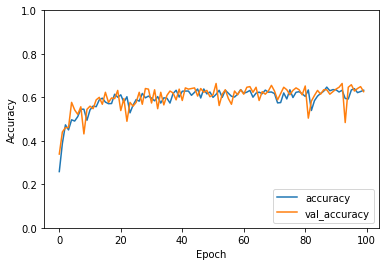

In [ ]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_img_pca, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.8027
Test accuracy: 0.6682


In [ ]:
pre_img_test = full_model.predict(test_img_pca)
pre_img_train = full_model.predict(train_img_pca)

54/54 [==============================] - 0s 1ms/step


In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[8.9833516e-01 2.4628177e-02 1.6353253e-03 2.5201698e-05 4.2803618e-03
 6.9356054e-02 1.6713621e-03 6.8262714e-05 4.3403470e-27 4.1279546e-11
 1.7026442e-08]
0.89833516
0
0.9999999


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(431,)

In [ ]:
pre_img[0], test_y[0]

(0, array([0]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[35  0  0  0  0  0  1  0  0  0  0]
 [34  0  0  2  0  4  0  0  0  0  0]
 [32  0  0  7  0  1  0  0  0  0  0]
 [24  0  0 13  0  0  0  0  0  0  0]
 [14  0  0 13  0  4  0  0  0  0  0]
 [39  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  7  0]
 [ 0  0  0  0  0  0  0  0 41  3  0]
 [ 3  0  0  0  0  0  0  0  2 35  0]
 [ 0  0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.19      0.97      0.32        36
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        40
           3       0.37      0.35      0.36        37
           4       0.00      0.00      0.00        31
           5       0.31      0.09      0.14        43
           6       0.98      1.00      0.99        45
           7       1.00      0.80      0.89        35
           8       0.95      0.93      0.94        44
           9       0.78      0.88      0.82        40
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'True Label')

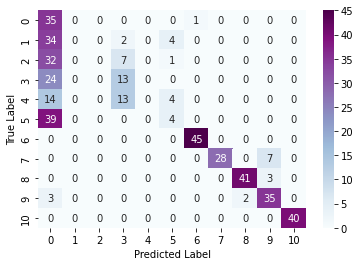

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')